In [8]:
from google.colab import drive
drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


In [46]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import graphviz 

# 데이터 경로
file_path = "/gdrive/MyDrive/ML/PlayTennis.csv"
# 데이터 경로로부터 파일을 읽음 (pandas 라이브러리 사용)
datas = pd.read_csv(file_path)

# 데이터 출력 (데이터 형태 확인)
print(datas)

     outlook  temp humidity  windy play date      time
0      sunny   hot     high  False   no  Sun  10-45-12
1      sunny   hot     high   True   no  Sun  16-01-50
2   overcast   hot     high  False  yes  Mon  15-35-05
3      rainy  mild     high  False  yes  Tue  09-48-10
4      rainy  cool   normal  False  yes  Tue  22-15-30
5      rainy  cool   normal   True   no  Wed  19-28-09
6   overcast  cool   normal   True  yes  Thu  12-56-53
7      sunny  mild     high  False   no  Sat  07-53-14
8      sunny  cool   normal  False  yes  Sun  15-36-11
9      rainy  mild   normal  False  yes  Mon  16-08-37
10     sunny  mild   normal   True  yes  Tue  20-17-46
11  overcast  mild     high   True  yes  Wed  18-26-58
12  overcast   hot   normal  False  yes  Wed  13-22-33
13     rainy  mild     high   True   no  Thu  18-39-20


#1. time 값을 시간,분,초의 3개 feature value로 분할
###하나의 feature value를 개의 feature value로 분할하면 확률값을 더 세분화하여 조절할 수 있습니다. 그 결과 성능을 향상시킬 수 있습니다.

In [47]:
# 범주형 데이터를 수치형 데이터로 자동 변환해주는 라이브러리
label_encoder = LabelEncoder()

# 정답 클래스 이름 (yes, no)
target_names = label_encoder.fit(datas['play']).classes_
print("target_names : {}".format(target_names))

datas['outlook'] = label_encoder.fit_transform(datas['outlook'])
datas['temp'] = label_encoder.fit_transform(datas['temp'])
datas['humidity'] = label_encoder.fit_transform(datas['humidity'])
datas['windy'] = label_encoder.fit_transform(datas['windy'])
datas['play'] = label_encoder.fit_transform(datas['play'])
datas['date'] = label_encoder.fit_transform(datas['date'])

#time 값을 3개의 feature value로 분할
times=datas.time
hour,minute,second=[],[],[]
for i in times:
  t=i.split('-')
  hour.append(t[0])
  minute.append(t[1])
  second.append(t[2])

datas['hour']=label_encoder.fit_transform(hour)
datas['minute']=label_encoder.fit_transform(minute)
datas['second']=label_encoder.fit_transform(second)

datas=datas.drop(['time'],axis=1)
# 데이터 출력 (데이터 포맷 변환 후 결과 확인)
print(datas)

target_names : ['no' 'yes']
    outlook  temp  humidity  windy  play  date  hour  minute  second
0         2     1         0      0     0     2     2      10       4
1         2     1         0      1     0     2     6       0      11
2         0     1         0      0     1     0     5       7       0
3         1     2         0      0     1     4     1      11       2
4         1     0         1      0     1     4    10       2       7
5         1     0         1      1     0     5     8       6       1
6         0     0         1      1     1     3     3      13      12
7         2     2         0      0     0     1     0      12       5
8         2     0         1      0     1     2     5       8       3
9         1     2         1      0     1     0     6       1       9
10        2     2         1      1     1     4     9       3      10
11        0     2         0      1     1     5     7       5      13
12        0     1         1      0     1     5     4       4       8
13    

In [49]:
# 입력 데이터와 정답 데이터로 분리
x_data, y_data = datas.drop(['play'], axis=1), datas['play']

# 분리 결과 확인
print(x_data)
print()
print(y_data)

    outlook  temp  humidity  windy  date  hour  minute  second
0         2     1         0      0     2     2      10       4
1         2     1         0      1     2     6       0      11
2         0     1         0      0     0     5       7       0
3         1     2         0      0     4     1      11       2
4         1     0         1      0     4    10       2       7
5         1     0         1      1     5     8       6       1
6         0     0         1      1     3     3      13      12
7         2     2         0      0     1     0      12       5
8         2     0         1      0     2     5       8       3
9         1     2         1      0     0     6       1       9
10        2     2         1      1     4     9       3      10
11        0     2         0      1     5     7       5      13
12        0     1         1      0     5     4       4       8
13        1     2         0      1     3     7       9       6

0     0
1     0
2     1
3     1
4     1
5     0
6     

In [52]:
# Decision tree 모델 학습 ()
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy')
train_result = decision_tree.fit(x_data, y_data)

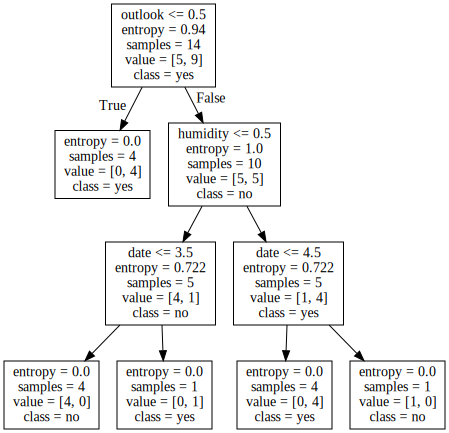

In [53]:
# 학습 결과 확인 (graphviz 라이브러리 사용)
graph = graphviz.Source(tree.export_graphviz(train_result, out_file=None,
                                             feature_names=x_data.columns,
                                             class_names=target_names)) 
graph

In [54]:
# 학습한 모델을 사용하여 예측
predict_result = decision_tree.predict(x_data)

# 예측 결과 출력 (실제 정답을 맞춘 경우 True로 표시됨)
print(predict_result == y_data)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: play, dtype: bool
